In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
iris = load_iris()

In [3]:
X = iris.data
y= iris.target

In [4]:
X_scaled = StandardScaler().fit_transform(X)

In [5]:
X.shape

(150, 4)

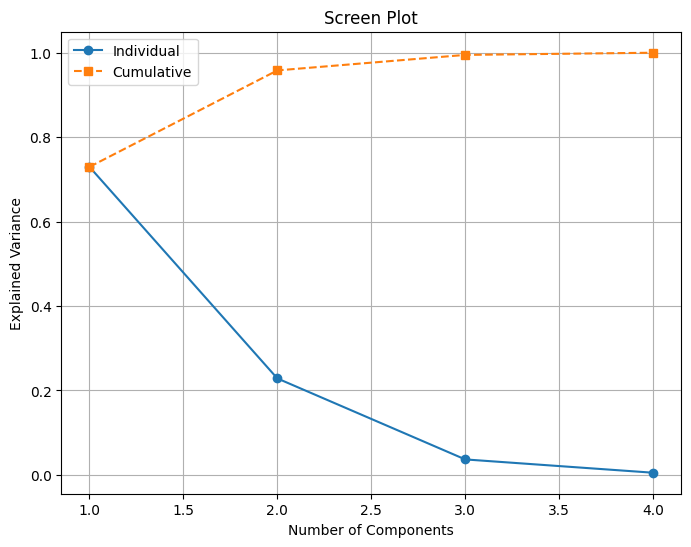

In [8]:
import warnings
warnings.filterwarnings('ignore')
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_,'o-',label='Individual')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 's--', label='Cumulative')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Screen Plot')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
pca_95 = PCA(n_components=0.95)
X_reduced = pca_95.fit_transform(X_scaled)
X_reduced.shape

(150, 2)

**Visualize top 2 components**

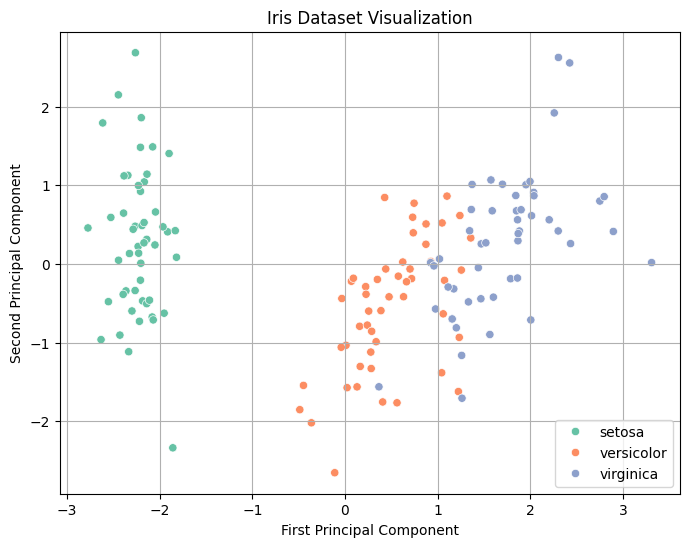

In [13]:
pca_2d = PCA(n_components=2)
X_reduced_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced_2d[:,0], y=X_reduced_2d[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris Dataset Visualization')
plt.grid(True)
plt.show()

# **Task: Customer Personality Aanalysis dataset**

In [14]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [15]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1.  – Data Preparation             
Load the dataset.            
Select only numerical features relevant to customer behavior.            
Handle missing values.            
Standardize the data.           

In [18]:



behavior_cols = [
    'Income','Recency',
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumWebPurchases',
    'NumCatalogPurchases','NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
    'AcceptedCmp4','AcceptedCmp5',
    'Response'
]

df_numeric = df[behavior_cols].copy()

df_numeric['Income'].fillna(df_numeric['Income'].median(), inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=df_numeric.columns
)

df_scaled.head()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0.235696,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,2.388846
1,-0.235454,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612
2,0.773999,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612
3,-1.022355,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612
4,0.241888,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612


2.   PCA Implementation     
Apply PCA on the standardized dataset.       
Plot the explained variance ratio.       
Determine:          
How many principal components are needed to retain at least 90% of total variance?        
Reduce the dataset to those components.     

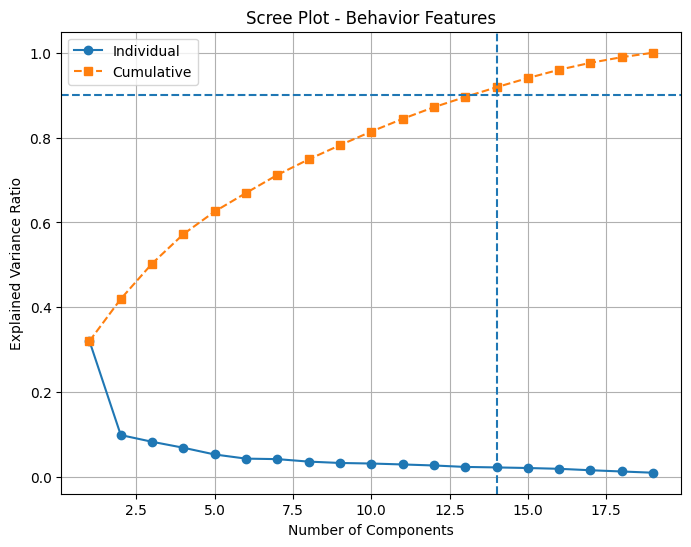

Number of components to retain ≥90% variance: 14
Reduced dataset shape: (2240, 14)


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[behavior_cols].copy()


X['Income'].fillna(X['Income'].median(), inplace=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

n_components_90 = np.argmax(cumulative_var >= 0.90) + 1


plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_var)+1), explained_var, 'o-', label='Individual')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 's--', label='Cumulative')

plt.axhline(y=0.90, linestyle='--')
plt.axvline(x=n_components_90, linestyle='--')

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Behavior Features')
plt.legend()
plt.grid(True)
plt.show()

print("Number of components to retain ≥90% variance:", n_components_90)


pca_final = PCA(n_components=n_components_90)
X_reduced = pca_final.fit_transform(X_scaled)

print("Reduced dataset shape:", X_reduced.shape)


3. Interpretation        
Identify:      
Which original features contribute most to PC1?        
Which features dominate PC2?         
Explain what PC1 and PC2 represent in business terms.  

In [26]:



loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=df_numeric.columns
)


pc1_contrib = loadings['PC1'].abs().sort_values(ascending=False)
pc2_contrib = loadings['PC2'].abs().sort_values(ascending=False)

print("Top contributors to PC1:\n")
print(pc1_contrib.head(10))

print("\nTop contributors to PC2:\n")
print(pc2_contrib.head(10))


Top contributors to PC1:

NumCatalogPurchases    0.329536
MntMeatProducts        0.324782
MntWines               0.317219
Income                 0.302816
NumStorePurchases      0.291094
MntFishProducts        0.287816
MntSweetProducts       0.280764
MntFruits              0.278300
NumWebVisitsMonth      0.252136
MntGoldProds           0.229655
Name: PC1, dtype: float64

Top contributors to PC2:

AcceptedCmp4         0.429291
Response             0.400057
AcceptedCmp2         0.399213
AcceptedCmp5         0.335704
AcceptedCmp1         0.301409
NumWebVisitsMonth    0.220998
MntFruits            0.217455
MntFishProducts      0.216914
MntWines             0.197284
AcceptedCmp3         0.193942
Name: PC2, dtype: float64


4.   Practical Application           
Visualize customers in 2D PCA space.          
Now apply K-Means clustering on:        
Original dataset           
PCA-reduced dataset            
Compare:           
Silhouette score             
Computation time           
Cluster separation quality

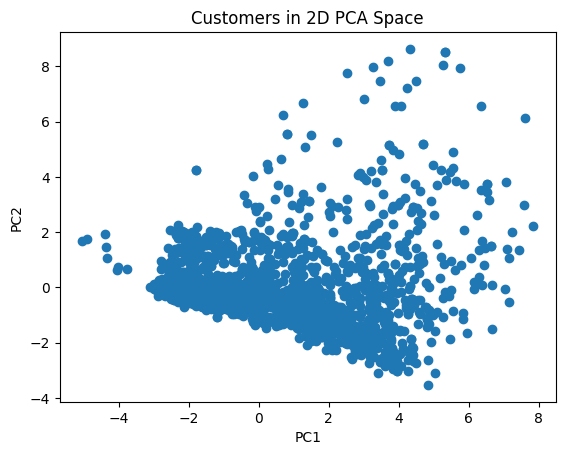

KMeans on Original Data
Silhouette Score: 0.23249173272705015
Computation Time: 0.0835108757019043 seconds

KMeans on PCA-Reduced Data
Silhouette Score: 0.25359541504995614
Computation Time: 0.04851031303405762 seconds


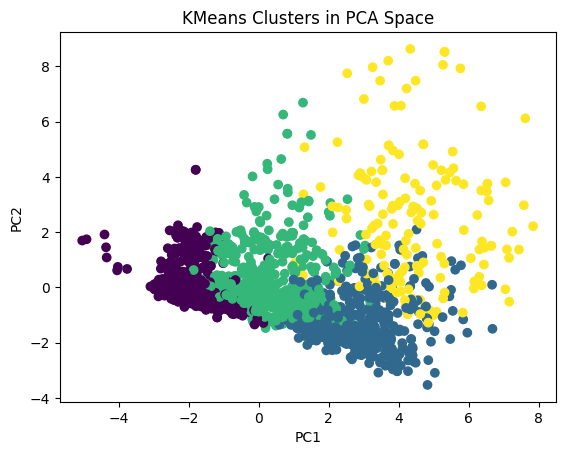

In [27]:


import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k=4

pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

plt.figure()
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in 2D PCA Space")
plt.show()



start_time = time.time()
kmeans_original = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(df_scaled)
time_original = time.time() - start_time

sil_original = silhouette_score(df_scaled, labels_original)




start_time = time.time()
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(df_pca)
time_pca = time.time() - start_time

sil_pca = silhouette_score(df_pca, labels_pca)



print("KMeans on Original Data")
print("Silhouette Score:", sil_original)
print("Computation Time:", time_original, "seconds")

print("\nKMeans on PCA-Reduced Data")
print("Silhouette Score:", sil_pca)
print("Computation Time:", time_pca, "seconds")




plt.figure()
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=labels_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters in PCA Space")
plt.show()
